### Imports

In [1]:
from pathlib import Path
import sys,os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(''))))

# Allen SDK data (Visual Behavior project)
import allensdk
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

# dataset plotting
import visual_behavior_plotting.visual_behavior.plotting.behavior_plots as behav_plt
import visual_behavior_plotting.visual_behavior.plotting.neural_plots as neural_plt

### Loading an example dataset with Allen SDK

In [9]:
# Update this to a valid directory in your filesystem
data_storage_directory = os.path.join(".","data")
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

See what optical physiology ("ophys") experiment datasets there are

In [3]:
ophys_experiment_table = cache.get_ophys_experiment_table()
ophys_experiment_table.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920


select a random experiment ID and load the dataset for it

In [4]:
ophys_experiment_id = 951980473
ophys_dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id)

### Behavior attribute plotting

Plot individual datastreams

<AxesSubplot:title={'center':'running speed'}, xlabel='time (sec)', ylabel='speed (cm/s)'>

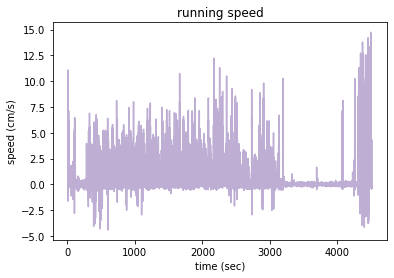

In [10]:
behav_plt.plot_running(ophys_dataset)

<AxesSubplot:title={'center':'pupil area'}, xlabel='time (sec)', ylabel='pupil area\n$(pixels^2)$'>

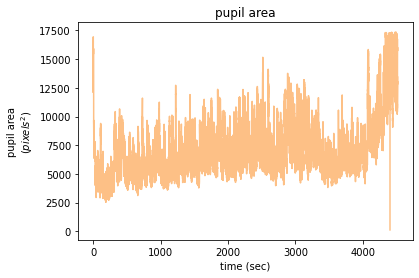

In [6]:
behav_plt.plot_pupil_area(ophys_dataset)

experiment=True


(<Figure size 1080x576 with 3 Axes>,
 array([<AxesSubplot:title={'center':'running speed'}, ylabel='speed (cm/s)'>,
        <AxesSubplot:title={'center':'licks and rewards'}>,
        <AxesSubplot:title={'center':'pupil area'}, ylabel='pupil area\n$(pixels^2)$'>],
       dtype=object))

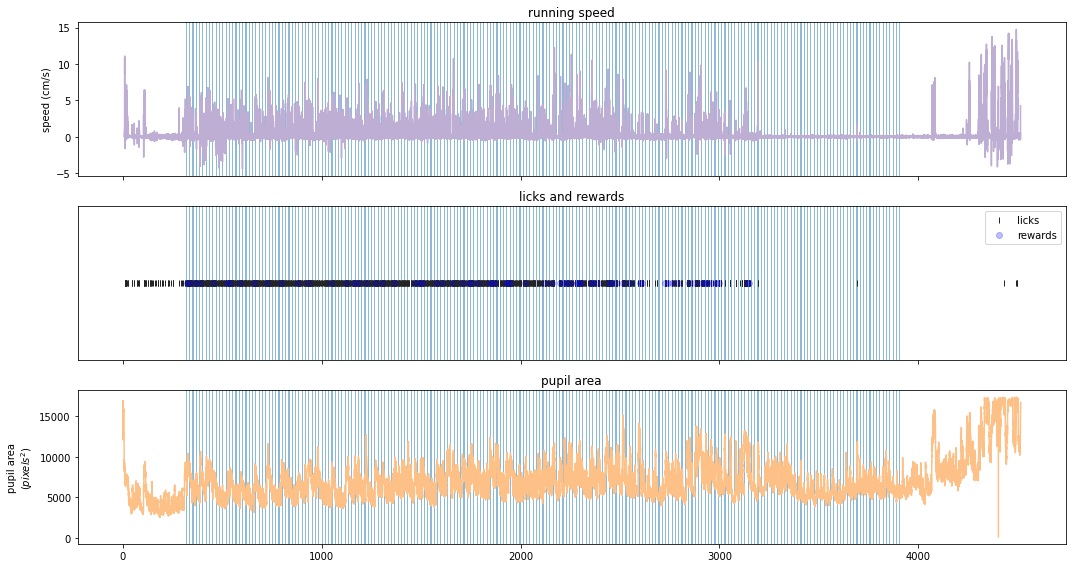

In [7]:
behav_plt.plot_behavioral_streams(ophys_dataset)

### Neural / optical physiology attribute plots

Plot the projections: 2D image of the microscope field of view, (average or maximum pixel value across the 
experiment)

<AxesSubplot:>

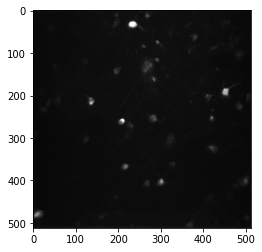

In [8]:
neural_plt.plot_max_projection(ophys_dataset)

<AxesSubplot:>

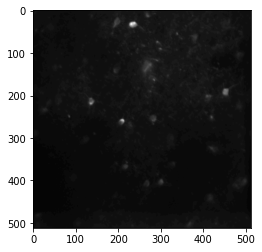

In [9]:
neural_plt.plot_average_projection(ophys_dataset)

plot the segmented neurons / regions of interest

<AxesSubplot:>

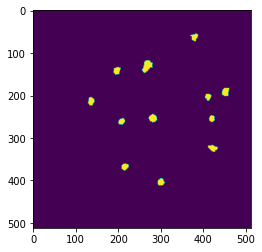

In [10]:
neural_plt.plot_segmentation_masks(ophys_dataset)

plot the segmented cells on top of the field of view projections

<AxesSubplot:>

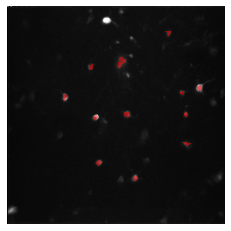

In [11]:
# default behavior is masks plotted over the max intensity projection
neural_plt.plot_segmentation_mask_overlay(ophys_dataset)

<AxesSubplot:>

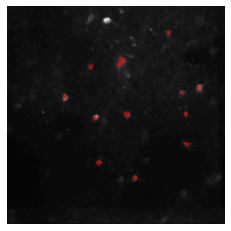

In [12]:
neural_plt.plot_segmentation_mask_overlay(ophys_dataset, projection_type = "average")

Plot the fluorescence / cell activity trace 

<AxesSubplot:title={'center':'Fluorescence trace'}, xlabel='time (sec)', ylabel='df/f'>

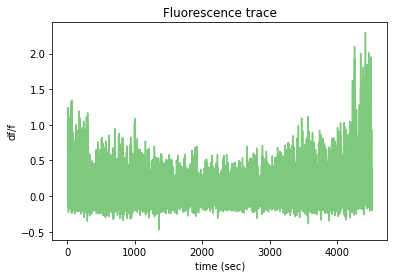

In [16]:
# default is the average fluroescence trace for all segmented neurons
neural_plt.plot_dff(ophys_dataset)

or specify a specific neuron/cell to plot the fluorescence for

In [17]:
ophys_dataset.dff_traces

,cell_roi_id,dff
cell_specimen_id,,
1086620813,1080744295,"[0.49592405557632446, 0.0, 0.3773442804813385,..."
1086621290,1080744315,"[0.5567723512649536, 1.0590603351593018, 0.352..."
1086621434,1080744321,"[0.11149812489748001, 0.08056601136922836, 0.3..."
1086621629,1080744326,"[0.4478145241737366, 0.3549301326274872, 0.313..."
1086621968,1080744337,"[0.4080601632595062, 0.18453606963157654, 0.09..."
1086622155,1080744341,"[0.5304669141769409, 0.09154000133275986, 0.37..."
1086622408,1080744344,"[1.143819808959961, 0.9079411625862122, 0.8253..."
1086622595,1080744349,"[0.219118133187294, 0.24321512877941132, 0.170..."
1086622778,1080744354,"[0.5835363268852234, 0.7810882329940796, 0.391..."


<AxesSubplot:title={'center':'Fluorescence trace'}, xlabel='time (sec)', ylabel='df/f'>

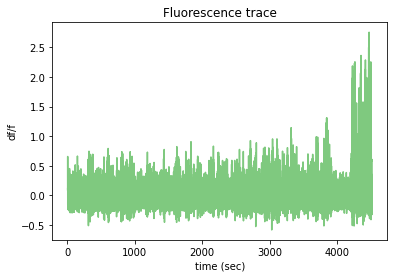

In [14]:
# or specify a specific neuron/cell to plot the fluorescence for
neural_plt.plot_dff(ophys_dataset, cell_specimen_id = 1086621434)

plot a heatmap of all the fluroescence activity for all neurons in an ophys dataset

C:\Users\kater\AI_python_packages\visual_behavior_plotting\visual_behavior\plotting\neural_plots.py:199: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0, timestamps[-1], 300))


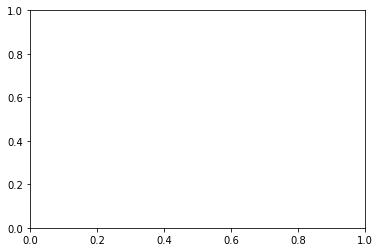

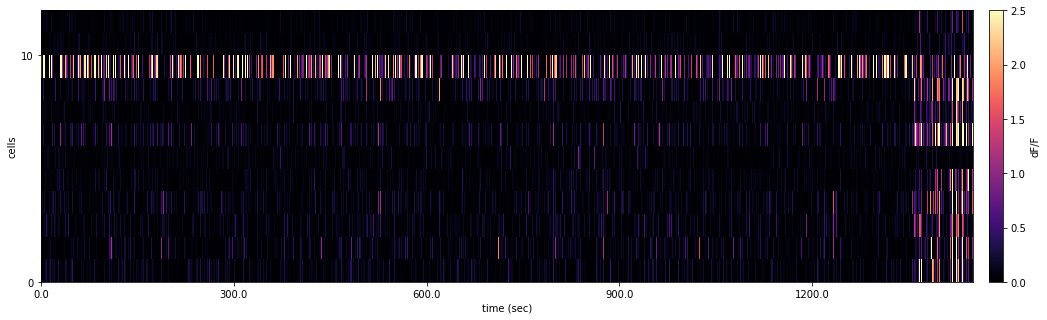

In [15]:
neural_plt.plot_dff_heatmap(ophys_dataset)

(<Figure size 360x720 with 1 Axes>, <AxesSubplot:>)

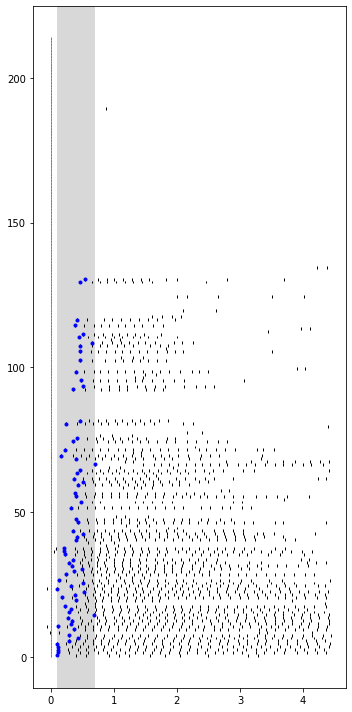

In [7]:
behav_plt.plot_lick_raster(ophys_dataset,exclude_aborted=True)